<a href="https://colab.research.google.com/github/lamide-xxx/Deepfake-Detection/blob/main/FakeAVCeleb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount Google Drive**

In [2]:
#Mount Google Drive on Notebook
from google.colab import drive
drive.mount('/content/drive')#, force_remount = True)

Mounted at /content/drive


# Data Preprocessing

The data is shared with me on my drive, so I first create a shortcut on my drive.

In [ ]:
# Change the directory and unzip it
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/data/deepfake-videos')  #change dir
!unzip -o FakeAVCeleb_v1.2.zip -d .  #unzip data, a folder train/ will be created

unzip:  cannot find or open FakeAVCeleb_v1.2.zip, FakeAVCeleb_v1.2.zip.zip or FakeAVCeleb_v1.2.zip.ZIP.


Extract Infromation on the files from the metadatafile

In [ ]:
# import pandas module 
import pandas as pd 
from collections import OrderedDict,defaultdict

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/data/deepfake-videos/FakeAVCeleb')  #change dir
    
# making dataframe 
df = pd.read_csv("meta_data.csv") 
   
# output the dataframe
print(df.columns)

#rename columNs as there is an error form the source
df.rename(columns={"path":"filename", 'Unnamed: 9': "path"}, inplace = True)

# output the dataframe
print(df.columns)

print("There are ", len(df.index)," videos is total")

df.groupby(["category","race","gender"])["path"].unique()
# for n,g in df.groupby(["category","race","gender",df.path[:-7]]):
#   print ("n is ",n, " with length",len(g))





Index(['source', 'target1', 'target2', 'method', 'category', 'type', 'race',
       'gender', 'path', 'Unnamed: 9'],
      dtype='object')
Index(['source', 'target1', 'target2', 'method', 'category', 'type', 'race',
       'gender', 'filename', 'path'],
      dtype='object')
There are  21566  videos is total


category  race                  gender
A         African               men       [FakeAVCeleb/RealVideo-RealAudio/African/men/i...
                                women     [FakeAVCeleb/RealVideo-RealAudio/African/women...
          Asian (East)          men       [FakeAVCeleb/RealVideo-RealAudio/Asian (East)/...
                                women     [FakeAVCeleb/RealVideo-RealAudio/Asian (East)/...
          Asian (South)         men       [FakeAVCeleb/RealVideo-RealAudio/Asian (South)...
                                women     [FakeAVCeleb/RealVideo-RealAudio/Asian (South)...
          Caucasian (American)  men       [FakeAVCeleb/RealVideo-RealAudio/Caucasian (Am...
                                women     [FakeAVCeleb/RealVideo-RealAudio/Caucasian (Am...
          Caucasian (European)  men       [FakeAVCeleb/RealVideo-RealAudio/Caucasian (Eu...
                                women     [FakeAVCeleb/RealVideo-RealAudio/Caucasian (Eu...
B         African               men      

Splitting the data.

Going with a training:validation:test split of 80:10:10

In [ ]:
import math
#pd.set_option('display.width', None)
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1) # display maximum column width
groups = (df.groupby(["category","race","gender"])["path"].unique()) #get the list of people in each folder
print(groups)
ans = []
d = {}
#split each folder into train:val:test
for group in groups:
  n = len(group)
  train = math.floor(n*0.8)
  val = math.floor(n*0.1) + train
  test = n
  
  #get train batch
  for path in group[:train]:
    d[path] = "train"
  
  #get val batch
  for path in group[train:val]:
    d[path] = "val"

  #label test batch
  for path in group[val:]:
    d[path] = "test"

category  race                  gender
A         African               men       [FakeAVCeleb/RealVideo-RealAudio/African/men/id00076, FakeAVCeleb/RealVideo-RealAudio/African/men/id00166, FakeAVCeleb/RealVideo-RealAudio/African/men/id00173, FakeAVCeleb/RealVideo-RealAudio/African/men/id00366, FakeAVCeleb/RealVideo-RealAudio/African/men/id00391, FakeAVCeleb/RealVideo-RealAudio/African/men/id00475, FakeAVCeleb/RealVideo-RealAudio/African/men/id00476, FakeAVCeleb/RealVideo-RealAudio/African/men/id00478, FakeAVCeleb/RealVideo-RealAudio/African/men/id00518, FakeAVCeleb/RealVideo-RealAudio/African/men/id00701, FakeAVCeleb/RealVideo-RealAudio/African/men/id00761, FakeAVCeleb/RealVideo-RealAudio/African/men/id00781, FakeAVCeleb/RealVideo-RealAudio/African/men/id00830, FakeAVCeleb/RealVideo-RealAudio/African/men/id00944, FakeAVCeleb/RealVideo-RealAudio/African/men/id00987, FakeAVCeleb/RealVideo-RealAudio/African/men/id01036, FakeAVCeleb/RealVideo-RealAudio/African/men/id01076, FakeAVCeleb/RealV

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [ ]:
#sort the dataframe
df.sort_values(by=['category', 'race','gender','path'], ascending=True, inplace = True)

split =[]
for path in df["path"]:
  split.append(d[path])

Now merge this splits with the dataframe for further processing

In [ ]:
df["split"] = split

# Splitting files in the drive

Create the relevant folder structure




In [ ]:
# create the required folders
import os, shutil
gdrive_dir = '/content/drive/MyDrive/Colab Notebooks/data/deepfake-videos'

train_dir = os.path.join(gdrive_dir,'train')
val_dir   = os.path.join(gdrive_dir,'val')
test_dir  = os.path.join(gdrive_dir,'test')
if not os.path.exists(train_dir):
  os.mkdir(train_dir)
if not os.path.exists(val_dir):
  os.mkdir(val_dir)
if not os.path.exists(test_dir):
  os.mkdir(test_dir)

categories = ["RealVideo-RealAudio","RealVideo-FakeAudio","FakeVideo-RealAudio","FakeVideo-FakeAudio"]
races = ["African","Asian (East)","Asian (South)","Caucasian (American)","Caucasian (European)"]
genders = ["men","women"]

for path in [train_dir,val_dir,test_dir]:
  for category in categories:
    category_folder = os.path.join(path,category)
    if not os.path.exists(category_folder):
      os.mkdir(category_folder)
    for race in races:
      race_folder = os.path.join(category_folder,race)
      if not os.path.exists(race_folder):
        os.mkdir(race_folder)
      for gender in genders:
        gender_folder = os.path.join(race_folder,gender)
        if not os.path.exists(gender_folder):
          os.mkdir(gender_folder)



Now that the relevant folders are made, we need to copy videos across.

In [ ]:
# Sorting files into training folders
import os, shutil
gdrive_dir = '/content/drive/MyDrive/Colab Notebooks/data/deepfake-videos'
base_dir = gdrive_dir+ "/"
exceptions= []
copied = 0
for _,row in df.iterrows():
  # construct full file path
  source = os.path.join(base_dir+row["path"], row["filename"])
  destination = os.path.join(base_dir+row["split"], row["path"][12:])

  # copy only files
  if os.path.isfile(source):
    if not os.path.exists(destination):
      os.mkdir(destination)

    shutil.copy(source, destination)
    copied+=1
    print('copied ', row["path"],"/", row["filename"])
  else:
    exceptions.append(source)

print("\nSUCCESSFULLY COPIED ", copied, " FILES\n")
print("COULD NOT FIND THE FOLLOWING: ")
print(exceptions)


Streaming output truncated to the last 5000 lines.
copied  FakeAVCeleb/FakeVideo-FakeAudio/Asian (South)/women/id07136 / 00052_id04582_wavtolip.mp4
copied  FakeAVCeleb/FakeVideo-FakeAudio/Asian (South)/women/id07136 / 00052_id06232_wavtolip.mp4
copied  FakeAVCeleb/FakeVideo-FakeAudio/Asian (South)/women/id07136 / 00052_id06439_wavtolip.mp4
copied  FakeAVCeleb/FakeVideo-FakeAudio/Asian (South)/women/id07136 / 00052_id06752_wavtolip.mp4
copied  FakeAVCeleb/FakeVideo-FakeAudio/Asian (South)/women/id07136 / 00052_id07008_wavtolip.mp4
copied  FakeAVCeleb/FakeVideo-FakeAudio/Asian (South)/women/id07136 / 00052_id07051_wavtolip.mp4
copied  FakeAVCeleb/FakeVideo-FakeAudio/Asian (South)/women/id07136 / 00052_id07377_wavtolip.mp4
copied  FakeAVCeleb/FakeVideo-FakeAudio/Asian (South)/women/id07136 / 00052_id07689_wavtolip.mp4
copied  FakeAVCeleb/FakeVideo-FakeAudio/Asian (South)/women/id07236 / 00143_id05435_OvX-Jv_whcU_faceswap_id04529_wavtolip.mp4
copied  FakeAVCeleb/FakeVideo-FakeAudio/Asian (

# Preparing the Videos

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df[["path","filename","split"]]

Adding tags to the videos

In [ ]:
tags = []
for row in df["path"]:
  if ("FakeVideo" in row) or ("FakeAudio" in row):
    tags.append(1)      # Represent deepfakes with a value of 1
  else:
    tags.append(0)    #Represent normal videos with a value of 0
df["tag"] = tags

Import the required libraries

In [ ]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
from glob import glob
from tqdm import tqdm    # to show progress

create list of train,val and test videos

In [ ]:

tmpdf = df[["path","filename","split","tag"]]
train_df = df.loc[tmpdf["split"]=="train"]
val_df = df.loc[tmpdf["split"]=="val"]
test_df = df.loc[tmpdf["split"]=="test"]

print(len(train_df))#17472prev; 17413
print(len(val_df))#2078;2037
print(len(test_df))#2016;2116

17472
2078
2016


In [ ]:
train_df

video = []
for _,i in train_df.iterrows():
  video.append(os.path.join(i[9][12:],i[8]))
train_df["video"] = video
train_df = train_df[["video","tag"]]
train_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


video  \
0      RealVideo-RealAudio/African/men/id00076/00109.mp4                                                                
1      RealVideo-RealAudio/African/men/id00166/00010.mp4                                                                
2      RealVideo-RealAudio/African/men/id00173/00118.mp4                                                                
3      RealVideo-RealAudio/African/men/id00366/00118.mp4                                                                
4      RealVideo-RealAudio/African/men/id00391/00052.mp4                                                                
5      RealVideo-RealAudio/African/men/id00475/00099.mp4                                                                
6      RealVideo-RealAudio/African/men/id00476/00109.mp4                                                                
7      RealVideo-RealAudio/African/men/id00478/00206.mp4                                                                
8      RealVideo-RealAudio/African/men/id00518/00031.mp4                                                                
9      RealVideo-RealAudio/African/men/id00701/00092.mp4                                                                
10     RealVideo-RealAudio/African/men/id00761/00072.mp4                                                                
11     RealVideo-RealAudio/African/men/id00781/00092.mp4                                                                
12     RealVideo-RealAudio/African/men/id00830/00143.mp4                                                                
13     RealVideo-RealAudio/African/men/id00944/00135.mp4                                                                
14     RealVideo-RealAudio/African/men/id00987/00160.mp4                                                                
15     RealVideo-RealAudio/African/men/id01036/00010.mp4                                                                
16     RealVideo-RealAudio/African/men/id01076/00005.mp4                                                                
17     RealVideo-RealAudio/African/men/id01170/00021.mp4                                                                
18     RealVideo-RealAudio/African/men/id01171/00053.mp4                                                                
19     RealVideo-RealAudio/African/men/id01179/00160.mp4                                                                
20     RealVideo-RealAudio/African/men/id01207/00320.mp4                                                                
21     RealVideo-RealAudio/African/men/id01236/00005.mp4                                                                
22     RealVideo-RealAudio/African/men/id01392/00167.mp4                                                                
23     RealVideo-RealAudio/African/men/id01452/00001.mp4                                                                
24     RealVideo-RealAudio/African/men/id01521/00109.mp4                                                                
25     RealVideo-RealAudio/African/men/id01528/00017.mp4                                                                
26     RealVideo-RealAudio/African/men/id01530/00002.mp4                                                                
27     RealVideo-RealAudio/African/men/id01544/00044.mp4                                                                
28     RealVideo-RealAudio/African/men/id01597/00005.mp4                                                                
29     RealVideo-RealAudio/African/men/id01598/00044.mp4                                                                
30     RealVideo-RealAudio/African/men/id01610/00090.mp4                                                                
31     RealVideo-RealAudio/African/men/id01637/00002.mp4                                                                
32     RealVideo-RealAudio/African/men/id01691/00045.mp4                                                               

Extracting frames from the train videos

In [ ]:

gdrive_dir = '/content/drive/MyDrive/Colab Notebooks/data/deepfake-videos'
os.chdir(os.path.join(gdrive_dir,"train"))
for i in tqdm(range(train_df.shape[0])):
  count = 0  
  videoFile=list(train_df["video"])[i]
  tag=list(train_df["tag"])[i]
  cap = cv2.VideoCapture(videoFile) # capturing the video from the given path
  frameRate = cap.get(5) #frame rate

  while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
          # storing the frames in a new folder named train_1
          filename = gdrive_dir+"/train_2/"+"%d_"%tag+"".join(videoFile.split('/'))+"_frame%d.jpg" % count
          count+=1
          cv2.imwrite(filename, frame)
  cap.release()


100%|██████████| 17413/17413 [14:18<00:00, 20.28it/s]


Save the name of the frames withtheir corresponding tag

In [ ]:
# getting the names of all the images
images = glob("/content/drive/MyDrive/Colab Notebooks/data/deepfake-videos/train_2/*.jpg")
train_image = []
train_class = []

for i in tqdm(range(len(images))):
    # creating the image name
    train_image.append(images[i].split('/')[-1])
    # creating the class of image
    train_class.append(images[i].split('/')[-1][0])

# storing the images and their class in a dataframe
train_data = pd.DataFrame()
train_data['image'] = train_image
train_data['class'] = train_class

# converting the dataframe into csv file 
train_data.to_csv(gdrive_dir+'/train_2_images.csv',header=True, index=False)


100%|██████████| 95138/95138 [00:00<00:00, 726779.75it/s]


In [ ]:
real_images = glob("/content/drive/MyDrive/Colab Notebooks/data/deepfake-videos/train_1/RealVideo/*.jpg")

fake_images = glob("/content/drive/MyDrive/Colab Notebooks/data/deepfake-videos/train_1/FakeVideo/*.jpg") 

In [ ]:
len(real_images), len(fake_images)

(51802, 51989)

In [ ]:
len(images)+ len(fake_images) #103791

103791

In [ ]:
import shutil
train_data = pd.read_csv(gdrive_dir+"/train_2_images.csv")
for _,j in train_data.iterrows():
  try:
    if j[1] == 0:
      shutil.move(gdrive_dir+"/train_2/"+ j[0],gdrive_dir+"/train_2/"+"RealVideo",copy_function = shutil.copytree)
    else:
      shutil.move(gdrive_dir+"/train_2/"+j[0],gdrive_dir+"/train_2/"+"FakeVideo",copy_function = shutil.copytree)
  except:
    pass

Do the same for validation data

In [ ]:
video = []
for _,i in val_df.iterrows():
  video.append(os.path.join(i[9][12:],i[8]))
val_df["video"] = video
val_df = val_df[["video","tag"]]


gdrive_dir = '/content/drive/MyDrive/Colab Notebooks/data/deepfake-videos'
os.chdir(os.path.join(gdrive_dir,"val"))
for i in tqdm(range(val_df.shape[0])):
  count = 0  
  videoFile=list(val_df["video"])[i]
  tag=list(val_df["tag"])[i]
  cap = cv2.VideoCapture(videoFile) # capturing the video from the given path
  frameRate = cap.get(5) #frame rate

  while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
          # storing the frames in a new folder named val_1
          filename = gdrive_dir+"/val_2/"+"%d_"%tag+"".join(videoFile.split('/'))+"_frame%d.jpg" % count
          count+=1
          cv2.imwrite(filename, frame)
  cap.release()

# getting the names of all the images
images = glob("/content/drive/MyDrive/Colab Notebooks/data/deepfake-videos/val_2/*.jpg")
val_image = []
val_class = []

for i in tqdm(range(len(images))):
    # creating the image name
    val_image.append(images[i].split('/')[-1])
    # creating the class of image
    val_class.append(images[i].split('/')[-1][0])

# storing the images and their class in a dataframe
val_data = pd.DataFrame()
val_data['image'] = val_image
val_data['class'] = val_class

# converting the dataframe into csv file 
val_data.to_csv(gdrive_dir+'/val_2_images.csv',header=True, index=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
100%|██████████| 7130/7130 [00:00<00:00, 799117.86it/s]


In [ ]:
import shutil
val_data = pd.read_csv(gdrive_dir+"/val_2_images.csv")
for _,j in val_data.iterrows():
  if j[1] == 0:
    shutil.move(gdrive_dir+"/val_2/"+ j[0],gdrive_dir+"/val_2/"+"RealVideo",copy_function = shutil.copytree)
  else:
    shutil.move(gdrive_dir+"/val_2/"+j[0],gdrive_dir+"/val_2/"+"FakeVideo",copy_function = shutil.copytree)

In [ ]:
real = set(os.listdir(gdrive_dir+"/train_2/"+"RealVideo")+os.listdir(gdrive_dir+"/train_2/"+"FakeVideo"))
fake = set(os.listdir(gdrive_dir+"/val_2/"+"RealVideo")+os.listdir(gdrive_dir+"/val_2/"+"FakeVideo"))
print(real.intersection(fake))
# os.chdir(gdrive_dir+"/train_2/"+"FakeVideo")
# for i,f in enumerate(os.listdir()):
#     if i%2 == 0:
#       os.remove(f);

set()


3741

In [ ]:
# os.path.exists(gdrive_dir+"/train_2/"+"RealVideo")
# /content/drive/MyDrive/Colab Notebooks/data/deepfake-videos/train_2/RealVideo/0_RealVideo-RealAudioAfricanmenid0007600109.mp4_frame0.jpg'
# gdrive_dir
os.chdir(os.path.join(gdrive_dir,"train_2/FakeVideo"))
len(os.listdir(gdrive_dir+"/train_2/"+"FakeVideo"))#+len(os.listdir(gdrive_dir+"/train_2/"+"FakeVideo"))
# shutil.move(gdrive_dir+"/train_2/"+"RealVideo/"+'0_RealVideo-RealAudioAfricanmenid0007600109.mp4_frame0.jpg',gdrive_dir+"/train_2/",copy_function = shutil.copytree)

# Training the Video classification Model

Read all frames that we extracted earlier

In [28]:
import os
import math
import tensorflow
import keras
from keras.models import Sequential, load_model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from matplotlib.image import imread
from PIL import Image
import cv2
from keras.callbacks import CSVLogger,ModelCheckpoint,LearningRateScheduler, EarlyStopping# defining a function to save progress of the model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import pickle
gdrive_dir = '/content/drive/MyDrive/Colab Notebooks/data/deepfake-videos'

Read the csv files containing frame extracts and tags

In [11]:
train_data = pd.read_csv(gdrive_dir+"/train_3_images.csv")
val_data = pd.read_csv(gdrive_dir+"/val_3_images.csv")

# Organise both train and val folders into real and fake videos

In [ ]:
import shutil
for _,j in train_data.iterrows():
  if j[1] == 0:
    shutil.move(gdrive_dir+"/train_1/"+ j[0],gdrive_dir+"/train_1/"+"RealVideo",copy_function = shutil.copytree)
  else:
    shutil.move(gdrive_dir+"/train_1/"+j[0],gdrive_dir+"/train_1/"+"FakeVideo",copy_function = shutil.copytree)


In [ ]:
import shutil
for _,j in val_data.iterrows():
  if j[1] == 0:
    shutil.move(gdrive_dir+"/val_1/"+ j[0],gdrive_dir+"/val_1/"+"RealVideo",copy_function = shutil.copytree)
  else:
    shutil.move(gdrive_dir+"/val_1/"+j[0],gdrive_dir+"/val_1/"+"FakeVideo",copy_function = shutil.copytree)


In [ ]:
import shutil

seen = []
count = 1

for _,j in train_data.iterrows():
  if j[0][0]=="0":
    video = j[0].split(".")[0]
    if video not in seen:
      count = 1
      seen.append(video)

    if count%15 == 0:
      if os.path.exists(gdrive_dir+"/train_1/RealVideo/"+j[0]):
        os.remove(gdrive_dir+"/train_1/RealVideo/"+j[0])
    count +=1

In [ ]:
os.chdir(gdrive_dir+"/train_1/"+"RealVideo")
n_train_real= len(os.listdir())

In [ ]:
n_train_real

51802

Get the number of files in each folder

In [ ]:
os.chdir(gdrive_dir+"/train_1/"+"FakeVideo")
n_train_fake = len(os.listdir())
os.chdir(gdrive_dir+"/train_1/"+"RealVideo")
n_train_real= len(os.listdir())


os.chdir(gdrive_dir+"/val_1/"+"RealVideo")
n_val_real= len(os.listdir())
os.chdir(gdrive_dir+"/val_1/"+"FakeVideo")
n_val_fake= len(os.listdir())

print((n_train_fake,n_train_real,n_val_fake,n_val_real))

(51989, 51802, 6231, 8190)


# Attempt 1 - too much RAM Usage

Read the frames and store them as numpy array

In [ ]:
os.chdir(gdrive_dir+"/train_1")
# TRAINING DATA
#creating empty list
train_image = []

#for loop to read and store frames
for i in tqdm(range(train_data.shape[0])):
  # loading the image and keeping the target size as (224,224,3)
  img = image.load_img(train_data['image'][i], target_size=(224,224,3))
  # converting it to an array
  img = image.img_to_array(img)
  # normalizing the pixel value
  img = img/255
  # appending the image to the train_image list
  train_image.append(img)

#converting the list to numpy array
X_train = np.array(train_image)
y_train = train_data['class']
X_train.shape


 40%|████      | 40678/100458 [01:42<02:55, 339.68it/s]

In [ ]:
#VALIDATION DATA
os.chdir(gdrive_dir+"/val_1")
#creating empty list
val_image = []

#for loop to read and store frames
for i in tqdm(range(val_data.shape[0])):
  # loading the image and keeping the target size as (224,224,3)
  img = image.load_img(val_data['image'][i], target_size=(224,224,3))
  # converting it to an array
  img = image.img_to_array(img)
  # normalizing the pixel value
  img = img/255
  # appending the image to the train_image list
  val_image.append(img)

#converting the list to numpy array
X_val = np.array(val_image)
y_val = val_data['class']
X_val.shape
type(y_val)

Define Model architecure

In [ ]:
# creating the base model of pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False,input_shape = (224,224,3))


Extract freatures from the pre-trained model

In [ ]:
# extracting features for training frames
X_train = base_model.predict(X_train)
X_train.shape

In [ ]:
# extracting features for validation frames
X_val = base_model.predict(X_val)
X_val.shape

Reshape the feature extract for our fully connected layer

In [ ]:
X_train = X_train.reshape(100458, 7*7*512)
X_val = X_val.reshape(11945 ,7*7*512)

Normalize pixel values

In [ ]:
# normalizing the pixel values
max = X_train.max()
X_train = X_train/max
X_val = X_val/max

In [ ]:
# normalizing the pixel values
max = features_train.max()
X_train = features_train/max
X_val = features_val/max

Check input shape for our model

In [ ]:
# shape of images
X_train.shape

In [ ]:
#defining the model architecture
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(25088,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Attempt 2

CREATE DATA GENERATORS

In [ ]:
(n_train_fake,n_train_real,n_val_fake,n_val_real)= (51989, 51802, 6230, 8190)

In [ ]:
train_dir = gdrive_dir+"/train_1"
val_dir = gdrive_dir+"/val_1"

#parameters
batch_size = 64
img_width = 224
img_height = 224

# creating the base model of pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False,input_shape = (224,224,3))
#base_model.summary()

#data generator
datagen = image.ImageDataGenerator(rescale=1. /255)

#train generator
print("Generate VGG16 features for training data ... ")
train_datagen = datagen.flow_from_directory(train_dir, target_size = (img_width, img_height),batch_size = batch_size, class_mode = None, shuffle=False)
features_train = base_model.predict_generator(train_datagen,steps= (train_data.shape[0]//batch_size)+1)
print("Done.")

#val generator
print("Generate VGG16 features for validation data ... ")
val_datagen = datagen.flow_from_directory(val_dir, target_size =(img_width, img_height), batch_size = batch_size, class_mode = None, shuffle=False)
features_val = base_model.predict_generator(val_datagen,steps= (val_data.shape[0]//batch_size)+1)
print("Done.")


58900480/58889256 [==============================] - 0s 0us/step
Generate VGG16 features for training data ... 
Found 103791 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Done.
Generate VGG16 features for validation data ... 
Found 14420 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Done.


Save extracted Features to Drive

In [ ]:

# save to csv file
np.save(gdrive_dir+'/ExtractedFeatures/VGG16_features_train', features_train)
np.save(gdrive_dir+'/ExtractedFeatures/VGG16_features_val', features_val)


Load extracted features and labels


In [ ]:
features_train =np.load(gdrive_dir+'/ExtractedFeatures/VGG16_features_train.npy')
features_val = np.load(gdrive_dir+'/ExtractedFeatures/VGG16_features_val.npy')

#get the folder labels
train_labels= np.array([1]*n_train_fake+[0]* n_train_real)
val_labels = np.array([1]*n_val_fake+[0]*n_val_real)

(103791, 7, 7, 512)

Define model architecture

In [ ]:
#defining the model architecture
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
# model.add(Dropout(0.5))
# model.add(Dense(1024, activation='relu', ))
# model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 12,846,081
Trainable params: 12,846,081
Non-trainable params: 0
_________________________________________________________________


# Attempt 3 - Finetuning

CREATE DATA GENERATORS

In [34]:
train_dir = gdrive_dir+"/train_3"
val_dir = gdrive_dir+"/val_3"

#parameters
batch_size = 128
img_width = 224
img_height = 224


#data generator
datagen = image.ImageDataGenerator(rescale=1. /255)

dgen = image.ImageDataGenerator(rescale=1. /255, 
                                width_shift_range=0.2, # horizontal shift
                                height_shift_range=0.2, # vertical shift
                                horizontal_flip=True, # horizontal flip
                                brightness_range=[0.2,1.2]) # brightness)

#train generator
print("Generate features for training data ... ")#33054
train_datagen = dgen.flow_from_directory(train_dir,
                                            target_size = (img_width, img_height),
                                            batch_size = batch_size,
                                            class_mode = 'binary')
print("Done.")

#val generator
print("Generate features for validation data ... ")#2074
val_datagen = datagen.flow_from_directory(val_dir,
                                          target_size =(img_width, img_height),
                                          batch_size = batch_size,
                                          class_mode = 'binary')
print("Done.")


Generate features for training data ... 
Found 33054 images belonging to 2 classes.
Done.
Generate features for validation data ... 
Found 4010 images belonging to 2 classes.
Done.


Define Model Checkpoint Function

In [5]:
#Define model Checkpoint function
class MyModelCheckpoint(ModelCheckpoint):
  def __init__(self,*args,**kwargs):
    super().__init__(*args,**kwargs)

  def on_epoch_end(self,epoch,logs=None):
    super().on_epoch_end(epoch,logs)\

    filepath = self._get_file_path(epoch=epoch,logs=logs,batch=None)
    filepath = filepath.rsplit(".",1)[0]
    
    filepath+=".pkl"

    with open(filepath,'wb') as fp:
      pickle.dump(
          {
              'opt': model.optimizer.get_config(),
              'epoch': epoch+1
          }, fp,protocol = pickle.HIGHEST_PROTOCOL)
      print('\nEpoch %05d: saving optimizer to %s'%(epoch+1,filepath))

Define Metrics

In [69]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


Define compile function
- The optimizer applies a step decay schedule during training to decrease the learning rate as training progresses.  It is essential to preserve the current epoch that we are on to perform correctly after a training resume.
-other functions to save the progress of our model

In [6]:
def compile_model(model_name, opt):
  # def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10):
  #     def schedule(epoch):
  #         return initial_lr * (decay_factor ** np.floor(epoch/step_size))
  #     return LearningRateScheduler(schedule)

  #  #Learning Rate scheduler
  # lr_cb = step_decay_schedule(initial_lr=1e-2, decay_factor=0.75, \
  #                                       step_size=2)

  #Early Stopping
  es = EarlyStopping(monitor='val_accuracy', patience=10, verbose=0)

  #Weights Checkpoint
  weights_checkpoint = MyModelCheckpoint(
      model_name + '_weight-{epoch:02d}-{val_loss:.2f}.hdf5', 
      monitor='val_loss',
      verbose =1
      )
  history_logger = CSVLogger(model_name + '_history.log', separator=',', append=False)

  cb = [history_logger, weights_checkpoint, es]

  model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])#,f1_m,precision_m, recall_m,tensorflow.metrics.AUC()])

  return cb

# VGG16 Training

Define model

In [149]:
# build the convolutional base of VGG16 network
conv_base = VGG16(weights = 'imagenet', # the model if pre-trained on ImageNet
                  include_top = False, # do not include the FC layers
                  input_shape = (224,224,3))

# set the early layers (up to the 'block5_conv1')
# to non-trainable (weights will not be updated)
for layer in conv_base.layers:
    layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Add the top of the model

In [150]:
# build a classifier to put on top of the convolutional model
model = Sequential()
# for layer in VGG16_conv_base.layers[:-1]:
#   model.add(layer)
model.add(conv_base)
model.add(Flatten())
# model.add(Dropout(0.5))
# model.add(Dense(1024, activation='relu', ))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.summary()
# from tensorflow.keras.utils import plot_model
# plot_model(model, show_shapes=True) # visualize the CNN artitecture

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_22 (Flatten)        (None, 25088)             0         
                                                                 
 dense_44 (Dense)            (None, 256)               6422784   
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
                                                                 
 dense_45 (Dense)            (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


Compile our model

In [126]:
cb = compile_model(model_name='VGG16', opt=Adam(learning_rate=0.0001))

Training our model

In [127]:
model_folder = gdrive_dir+"/models"
if not os.path.exists(model_folder):
    os.mkdir(model_folder)

os.chdir(model_folder)

history = model.fit(train_datagen, 
                    steps_per_epoch=(train_data.shape[0]//batch_size)+1,
                    epochs=50,
                    batch_size=batch_size,
                    validation_data=val_datagen,
                    validation_steps=(val_data.shape[0]//batch_size)+1,
                    callbacks = cb)

Epoch 1/50
259/259 [==============================] - ETA: 0s - loss: 0.6591 - accuracy: 0.6118 - f1_m: 0.6039 - precision_m: 0.6188 - recall_m: 0.6340 - auc_15: 0.6525
Epoch 1: saving model to VGG16_weight-01-0.61.hdf5

Epoch 00001: saving optimizer to VGG16_weight-01-0.61.pkl
259/259 [==============================] - 454s 2s/step - loss: 0.6591 - accuracy: 0.6118 - f1_m: 0.6039 - precision_m: 0.6188 - recall_m: 0.6340 - auc_15: 0.6525 - val_loss: 0.6090 - val_accuracy: 0.6677 - val_f1_m: 0.5577 - val_precision_m: 0.7597 - val_recall_m: 0.4441 - val_auc_15: 0.7513
Epoch 2/50
259/259 [==============================] - ETA: 0s - loss: 0.6052 - accuracy: 0.6758 - f1_m: 0.6744 - precision_m: 0.6806 - recall_m: 0.6918 - auc_15: 0.7351
Epoch 2: saving model to VGG16_weight-02-0.57.hdf5

Epoch 00002: saving optimizer to VGG16_weight-02-0.57.pkl
259/259 [==============================] - 441s 2s/step - loss: 0.6052 - accuracy: 0.6758 - f1_m: 0.6744 - precision_m: 0.6806 - recall_m: 0.6918 - 

KeyboardInterrupt: ignored

Save our model

In [ ]:
model_folder = gdrive_dir+"/models"
if not os.path.exists(model_folder):
    os.mkdir(model_folder)
model.save(model_folder+'/VGG16_finetuning.h5')  # always save your models after training

# InceptionV3 Training

Define Our Model

In [151]:
# build the convolutional base of Xception network
conv_base = InceptionV3(weights = 'imagenet', # the model if pre-trained on ImageNet
                  include_top = False, # do not include the FC layers
                  input_shape = (224,224,3))

# set the early layers (up to the 'block5_conv1')
# to non-trainable (weights will not be updated)
for layer in conv_base.layers:
    layer.trainable = False
# for i,layer in enumerate(conv_base.layers):
#     print(i, layer.name,layer.trainable)
conv_base.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)           

Add the top of the model

In [155]:

# build a classifier to put on top of the convolutional model
model = Sequential()
model.add(conv_base)
# model.add(GlobalAveragePooling2D())
model.add(Flatten())
# model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_24 (Flatten)        (None, 51200)             0         
                                                                 
 dense_48 (Dense)            (None, 512)               26214912  
                                                                 
 dropout_30 (Dropout)        (None, 512)               0         
                                                                 
 dense_49 (Dense)            (None, 1)                 513       
                                                                 
Total params: 48,018,209
Trainable params: 26,215,425
Non-trainable params: 21,802,784
_________________________________________________________________


Compile our model

In [156]:
cb = compile_model(model_name='Inception', opt=Adam(learning_rate=0.0001))

Train Model

In [157]:
model_folder = gdrive_dir+"/models"
if not os.path.exists(model_folder):
    os.mkdir(model_folder)

os.chdir(model_folder)

history = model.fit(train_datagen, 
                    steps_per_epoch=(train_data.shape[0]//batch_size)+1,
                    epochs=50,
                    batch_size=batch_size,
                    validation_data=val_datagen,
                    validation_steps=(val_data.shape[0]//batch_size)+1,
                    callbacks = cb)

Epoch 1/50
259/259 [==============================] - ETA: 0s - loss: 0.6810 - accuracy: 0.6217
Epoch 1: saving model to Inception_weight-01-0.64.hdf5

Epoch 00001: saving optimizer to Inception_weight-01-0.64.pkl
259/259 [==============================] - 463s 2s/step - loss: 0.6810 - accuracy: 0.6217 - val_loss: 0.6375 - val_accuracy: 0.6126
Epoch 2/50
259/259 [==============================] - ETA: 0s - loss: 0.5876 - accuracy: 0.6845
Epoch 2: saving model to Inception_weight-02-0.62.hdf5

Epoch 00002: saving optimizer to Inception_weight-02-0.62.pkl
259/259 [==============================] - 451s 2s/step - loss: 0.5876 - accuracy: 0.6845 - val_loss: 0.6188 - val_accuracy: 0.6457
Epoch 3/50
259/259 [==============================] - ETA: 0s - loss: 0.5614 - accuracy: 0.7100
Epoch 3: saving model to Inception_weight-03-0.59.hdf5

Epoch 00003: saving optimizer to Inception_weight-03-0.59.pkl
259/259 [==============================] - 450s 2s/step - loss: 0.5614 - accuracy: 0.7100 - va

#ResNet50 Training

Define Our model

In [42]:
# build the convolutional base of Xception network
conv_base = ResNet50(weights = 'imagenet', # the model if pre-trained on ImageNet
                  include_top = False, # do not include the FC layers
                  input_shape = (224,224,3))

# set the early layers (up to the 'block5_conv1')
# to non-trainable (weights will not be updated)
for layer in conv_base.layers:
    layer.trainable = False
# for i,layer in enumerate(conv_base.layers):
#     print(i, layer.name,layer.trainable)
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

Add Top of model

In [46]:

# build a classifier to put on top of the convolutional model
model = Sequential()
model.add(conv_base)
# model.add(GlobalAveragePooling2D())
model.add(Flatten())
# model.add(Dropout(0.5))
# model.add(Dense(1024, activation='relu', ))
model.add(Dense(1024, activation='relu'))
# # model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_5 (Flatten)         (None, 100352)            0         
                                                                 
 dense_10 (Dense)            (None, 1024)              102761472 
                                                                 
 dense_11 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 126,350,209
Trainable params: 102,762,497
Non-trainable params: 23,587,712
_________________________________________________________________


Compile Model

In [47]:
cb = compile_model(model_name='ResNet50', opt=Adam(learning_rate=0.00001))

Train model

In [ ]:
model_folder = gdrive_dir+"/models"
if not os.path.exists(model_folder):
    os.mkdir(model_folder)

os.chdir(model_folder)

history = model.fit(train_datagen, 
                    steps_per_epoch=(train_data.shape[0]//batch_size)+1,
                    epochs=50,
                    batch_size=batch_size,
                    validation_data=val_datagen,
                    validation_steps=(val_data.shape[0]//batch_size)+1,
                    callbacks = cb)

Epoch 1/50
 80/259 [========>.....................] - ETA: 5:04 - loss: 0.7024 - accuracy: 0.5104

#  Retrain Models

In [ ]:
model_folder = gdrive_dir+"/models"
MODEL_PATH = model_folder+'/good models/VGG16_weight-10-0.59.hdf5'
OPT_PATH = model_folder+'/good models/VGG16_weight-10-0.59.pkl'
MODEL_NAME = 'VGG16_improved'
model = load_model(MODEL_PATH)

In [ ]:
model.layers[0].trainable = False
for layer in model.layers:
    print(layer.name, layer.trainable)

vgg16 False
flatten_7 True
dropout_16 True
dense_21 True
dropout_17 True
dense_22 True
dropout_18 True
dense_23 True
dropout_19 True
dense_24 True


In [ ]:
train_dir = gdrive_dir+"/train_3"
val_dir = gdrive_dir+"/val_3"

#parameters
batch_size = 128
img_width = 224
img_height = 224


#data generator
datagen = image.ImageDataGenerator(rescale=1. /255)

#train generator
print("Generate features for training data ... ")#33054
train_datagen = datagen.flow_from_directory(train_dir,
                                            target_size = (img_width, img_height),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)
print("Done.")

# get the list of training files
gen_images = [train_datagen.filenames]


Generate features for training data ... 
Found 33054 images belonging to 2 classes.
Done.


In [ ]:
gen_images = [train_datagen.filenames][0]

In [ ]:
len(gen_images)

33054

In [ ]:
os.chdir(gdrive_dir+"/train_3/"+"RealVideo")
n_train_real= len(os.listdir())
os.chdir(gdrive_dir+"/train_3/"+"FakeVideo")
n_train_fake= len(os.listdir())


#get the folder labels
train_labels= np.array([0]*n_train_fake+[1]* n_train_real)

In [ ]:
train_labels.size

33054

In [ ]:
y_pred = model.predict(train_datagen)
y_pred_bin = np.where(y_pred > 0.5, 1, 0)

259/259 [==============================] - 3148s 12s/step


In [ ]:
missed =[]
         
for idx, t in enumerate(zip(list(train_labels),list(y_pred_bin))):
  try:
    if t[0] != t[1]:
      missed.append(gen_images[idx])
  except:
    print(idx)

len(missed)

1159

In [ ]:
import shutil
os.chdir(gdrive_dir + '/train_3')
for file in missed:
  shutil.copy(file, gdrive_dir + '/train_4/'+file)

In [ ]:
os.chdir(gdrive_dir + '/train_4/RealVideo')
for pic in os.listdir(gdrive_dir + '/train_4/RealVideo'):
  if ('1.jpg') in pic:
    shutil.copy(pic, pic.split('1.jpg')[0]+ '2.jpg')



In [ ]:
from glob import glob
len(glob(gdrive_dir + '/FakeAVCeleb/RealVideo*/*/*/*/*.mp4')), len(glob(gdrive_dir + '/FakeAVCeleb/FakeVideo*/*/*/*/*.mp4'))

(1000, 20544)

Train the model

In [ ]:
os.chdir(model_folder)
def load_model_data(model_path, opt_path, model_name):
  model = load_model(model_path)
  
  #Early Stopping
  es = EarlyStopping(monitor='val_accuracy', patience=5, verbose=0)

  #Weights Checkpoint
  weights_checkpoint = MyModelCheckpoint(
      model_name + '_weight-{epoch:02d}-{val_loss:.2f}.hdf5', 
      monitor='val_loss',
      verbose =1
      )
  history_logger = CSVLogger(model_name + '_history.log', separator=',', append=False)

  cb = [history_logger, weights_checkpoint, es]

  with open(opt_path, 'rb') as fp:
    d = pickle.load(fp)
    epoch = d['epoch']
    opt = d['opt']
    return epoch,model,opt,cb

epoch, model, opt, cb = load_model_data(MODEL_PATH,OPT_PATH,MODEL_NAME)

model.compile(loss='binary_crossentropy',
              optimizer= tensorflow.optimizers.Adam.from_config(opt),
              metrics=['accuracy'])


In [ ]:
train_dir = gdrive_dir+"/train_4"
train_datagen = datagen.flow_from_directory(train_dir,
                                            target_size = (img_width, img_height),
                                            batch_size = batch_size,
                                            class_mode = 'binary')

Found 1656 images belonging to 2 classes.


In [ ]:
(len(train_datagen.filenames))

1656

In [ ]:
history = model.fit(train_datagen, steps_per_epoch=(len(train_datagen.filenames)//batch_size)+1,
          epochs=40,
          initial_epoch = epoch,
          batch_size=128,
          validation_data=val_datagen,
          validation_steps=(val_data.shape[0]//batch_size)+1,
          callbacks = cb)

Epoch 11/40
13/13 [==============================] - ETA: 0s - loss: 0.8746 - accuracy: 0.4656
Epoch 11: saving model to VGG16_improved_weight-11-1.01.hdf5

Epoch 00011: saving optimizer to VGG16_improved_weight-11-1.01.pkl
13/13 [==============================] - 12s 791ms/step - loss: 0.8746 - accuracy: 0.4656 - val_loss: 1.0070 - val_accuracy: 0.0487
Epoch 12/40
13/13 [==============================] - ETA: 0s - loss: 0.7231 - accuracy: 0.4837
Epoch 12: saving model to VGG16_improved_weight-12-0.80.hdf5

Epoch 00012: saving optimizer to VGG16_improved_weight-12-0.80.pkl
13/13 [==============================] - 10s 785ms/step - loss: 0.7231 - accuracy: 0.4837 - val_loss: 0.8029 - val_accuracy: 0.0482
Epoch 13/40
13/13 [==============================] - ETA: 0s - loss: 0.6995 - accuracy: 0.4837
Epoch 13: saving model to VGG16_improved_weight-13-0.73.hdf5

Epoch 00013: saving optimizer to VGG16_improved_weight-13-0.73.pkl
13/13 [==============================] - 9s 752ms/step - loss: 0

Text(0.5, 0, 'epoch')

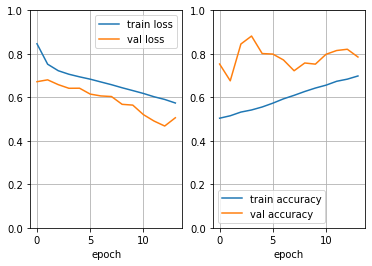

In [ ]:
# plot the learning curves
import matplotlib.pyplot as plt
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.grid(True)
plt.ylim([0,1.0])
plt.xlabel('epoch')

fig.add_subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.grid(True)
plt.ylim([0,1.0])
plt.xlabel('epoch')

# Load Model

Define paths

In [131]:
model_folder = gdrive_dir+"/models"
MODEL_PATH = model_folder+'/VGG16_weight-29-0.40_2.hdf5'
OPT_PATH = model_folder+'/VGG16_weight-29-0.40_2.pkl'
MODEL_NAME = 'VGG16'
batch_size = 256

load the model

In [ ]:
def load_model_data(model_path, opt_path, model_name):
  model = load_model(model_path)
  
  #Early Stopping
  es = EarlyStopping(monitor='val_accuracy', patience=5, verbose=0)

  #Weights Checkpoint
  weights_checkpoint = MyModelCheckpoint(
      model_name + '_weight-{epoch:02d}-{val_loss:.2f}.hdf5', 
      monitor='val_loss',
      verbose =1
      )
  history_logger = CSVLogger(model_name + '_history.log', separator=',', append=True)

  cb = [history_logger, weights_checkpoint, es]

  with open(opt_path, 'rb') as fp:
    d = pickle.load(fp)
    epoch = d['epoch']
    opt = d['opt']
    return epoch,model,opt,cb

epoch, model, opt, cb = load_model_data(MODEL_PATH,OPT_PATH,MODEL_NAME)

model.compile(loss='binary_crossentropy',
              optimizer= tensorflow.optimizers.Adam.from_config(opt),
              metrics=['accuracy'])



Train Model

In [ ]:
os.chdir(model_folder)
history = model.fit(train_datagen, 
                    steps_per_epoch=(train_data.shape[0]//batch_size)+1,
                    epochs=50,
                    initial_epoch = epoch,
                    batch_size=batch_size,
                    validation_data=val_datagen,
                    validation_steps=(val_data.shape[0]//batch_size)+1,
                    callbacks = cb)


Epoch 12/50
130/130 [==============================] - ETA: 0s - loss: 4.7609 - accuracy: 0.9154
Epoch 12: saving model to Inception_weight-12-5.20.hdf5

Epoch 00012: saving optimizer to Inception_weight-12-5.20.pkl
130/130 [==============================] - 88s 648ms/step - loss: 4.7609 - accuracy: 0.9154 - val_loss: 5.1973 - val_accuracy: 0.6543
Epoch 13/50
130/130 [==============================] - ETA: 0s - loss: 4.3595 - accuracy: 0.9244
Epoch 13: saving model to Inception_weight-13-4.83.hdf5

Epoch 00013: saving optimizer to Inception_weight-13-4.83.pkl
130/130 [==============================] - 82s 634ms/step - loss: 4.3595 - accuracy: 0.9244 - val_loss: 4.8269 - val_accuracy: 0.6663
Epoch 14/50
130/130 [==============================] - ETA: 0s - loss: 4.0268 - accuracy: 0.9331
Epoch 14: saving model to Inception_weight-14-4.48.hdf5

Epoch 00014: saving optimizer to Inception_weight-14-4.48.pkl
130/130 [==============================] - 83s 637ms/step - loss: 4.0268 - accuracy:

Plot Learning Curves

In [132]:
import pandas as pd
model_folder = gdrive_dir+"/models/good models/"
os.chdir(model_folder)
history = pd.read_csv('Inception_history.log', sep=',', engine='python')


Text(0.5, 0, 'epoch')

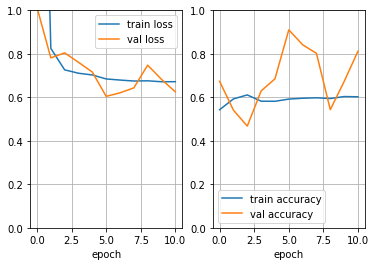

In [133]:
# plot the learning curves
import matplotlib.pyplot as plt
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.plot(history['loss'], label='train loss')
plt.plot(history['val_loss'], label='val loss')
plt.legend()
plt.grid(True)
plt.ylim([0,1.0])
plt.xlabel('epoch')

fig.add_subplot(1,2,2)
plt.plot(history['accuracy'], label='train accuracy')
plt.plot(history['val_accuracy'], label='val accuracy')
plt.legend()
plt.grid(True)
plt.ylim([0,1.0])
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

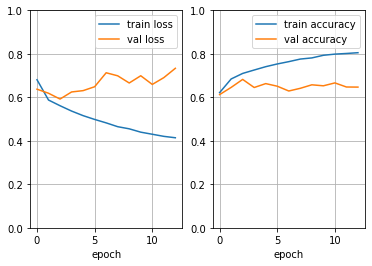

In [158]:
# plot the learning curves
import matplotlib.pyplot as plt
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.grid(True)
plt.ylim([0,1.0])
plt.xlabel('epoch')

fig.add_subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.grid(True)
plt.ylim([0,1.0])
plt.xlabel('epoch')

# Test videos preprocessing

Create test folder

In [ ]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
from glob import glob
from tqdm import tqdm    # to show progress

Create the test dataframe

In [ ]:
#tmpdf = df[["path","filename","split","tag"]]
test_df = df.loc[df["split"]=="test"]


video = []
for _,i in test_df.iterrows():
  video.append(os.path.join(i[9][12:],i[8]))
test_df["video"] = video
test_df = test_df[["video","tag"]]
test_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


video  \
45     RealVideo-RealAudio/African/men/id02296/00019.mp4                                                                
46     RealVideo-RealAudio/African/men/id02316/00094.mp4                                                                
47     RealVideo-RealAudio/African/men/id02342/00191.mp4                                                                
48     RealVideo-RealAudio/African/men/id02494/00050.mp4                                                                
49     RealVideo-RealAudio/African/men/id04727/00007.mp4                                                                
95     RealVideo-RealAudio/African/women/id05231/00149.mp4                                                              
96     RealVideo-RealAudio/African/women/id05235/00052.mp4                                                              
97     RealVideo-RealAudio/African/women/id05251/00033.mp4                                                              
98     RealVideo-RealAudio/African/women/id05252/00052.mp4                                                              
99     RealVideo-RealAudio/African/women/id05980/00143.mp4                                                              
245    RealVideo-RealAudio/Asian (East)/men/id08299/00110.mp4                                                           
246    RealVideo-RealAudio/Asian (East)/men/id08613/00074.mp4                                                           
247    RealVideo-RealAudio/Asian (East)/men/id08652/00006.mp4                                                           
248    RealVideo-RealAudio/Asian (East)/men/id09053/00005.mp4                                                           
249    RealVideo-RealAudio/Asian (East)/men/id09143/00056.mp4                                                           
295    RealVideo-RealAudio/Asian (East)/women/id09125/00098.mp4                                                         
296    RealVideo-RealAudio/Asian (East)/women/id09171/00092.mp4                                                         
297    RealVideo-RealAudio/Asian (East)/women/id09174/00015.mp4                                                         
298    RealVideo-RealAudio/Asian (East)/women/id09175/00072.mp4                                                         
299    RealVideo-RealAudio/Asian (East)/women/id09181/00048.mp4                                                         
445    RealVideo-RealAudio/Asian (South)/men/id07463/00028.mp4                                                          
446    RealVideo-RealAudio/Asian (South)/men/id07768/00143.mp4                                                          
447    RealVideo-RealAudio/Asian (South)/men/id08313/00202.mp4                                                          
448    RealVideo-RealAudio/Asian (South)/men/id08314/00028.mp4                                                          
449    RealVideo-RealAudio/Asian (South)/men/id08457/00417.mp4                                                          
495    RealVideo-RealAudio/Asian (South)/women/id07136/00052.mp4                                                        
496    RealVideo-RealAudio/Asian (South)/women/id07236/00143.mp4                                                        
497    RealVideo-RealAudio/Asian (South)/women/id07377/00025.mp4                                                        
498    RealVideo-RealAudio/Asian (South)/women/id07686/00254.mp4                                                        
499    RealVideo-RealAudio/Asian (South)/women/id07689/00028.mp4                                                        
145    RealVideo-RealAudio/Caucasian (American)/men/id04034/00009.mp4                                                   
146    RealVideo-RealAudio/Caucasian (American)/men/id04073/00021.mp4                                                   
147    RealVideo-RealAudio/Caucasian (American)/men/id04216/00470.mp4                                                  

Extract the test video frames and save information to csv

In [ ]:
gdrive_dir = '/content/drive/MyDrive/Colab Notebooks/data/deepfake-videos'
os.chdir(os.path.join(gdrive_dir,"test"))
for i in tqdm(range(test_df.shape[0])):
  count = 0  
  videoFile=list(test_df["video"])[i]
  tag=list(test_df["tag"])[i]
  cap = cv2.VideoCapture(videoFile) # capturing the video from the given path
  frameRate = cap.get(5) #frame rate

  while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
          # storing the frames in a new folder named test_1
          filename = gdrive_dir+"/test_2/"+"%d_"%tag+"".join(videoFile.split('/'))+"_frame%d.jpg" % count
          count+=1
          cv2.imwrite(filename, frame)
  cap.release()

# getting the names of all the images
images = glob("/content/drive/MyDrive/Colab Notebooks/data/deepfake-videos/test_2/*.jpg")
test_image = []
test_class = []

for i in tqdm(range(len(images))):
    # creating the image name
    test_image.append(images[i].split('/')[-1])
    # creating the class of image
    test_class.append(images[i].split('/')[-1][0])

# storing the images and their class in a dataframe
test_data = pd.DataFrame()
test_data['image'] = test_image
test_data['class'] = test_class

# converting the dataframe into csv file 
test_data.to_csv(gdrive_dir+'/test_2_images.csv',header=True, index=False)

100%|██████████| 7704/7704 [00:00<00:00, 728244.08it/s]


Organise test folder into real and fake videos

In [ ]:
import shutil
test_data = pd.read_csv(gdrive_dir+"/test_2_images.csv")
for _,j in test_data.iterrows():
  if j[1] == 0:
    shutil.move(gdrive_dir+"/test_2/"+ j[0],gdrive_dir+"/test_2/"+"RealVideo",copy_function = shutil.copytree)
  else:
    shutil.move(gdrive_dir+"/test_2/"+j[0],gdrive_dir+"/test_2/"+"FakeVideo",copy_function = shutil.copytree)


# Evaluating the Model

In [24]:
model_folder = gdrive_dir+"/models/good models/"
MODEL_PATH = model_folder+'/Inception_weight-13-0.73.hdf5'
OPT_PATH = model_folder+'/Inception_weight-13-0.73.pkl'
MODEL_NAME = 'VGG16'

In [25]:
model = load_model(MODEL_PATH)

Count the number of files in each folder. We will use this to get the training labels

In [14]:
os.chdir(gdrive_dir+"/test_3/"+"RealVideo")
n_test_real= len(os.listdir())
os.chdir(gdrive_dir+"/test_3/"+"FakeVideo")
n_test_fake= len(os.listdir())


#get the folder labels
test_labels= np.array([0]*n_test_fake+[1]* n_test_real)
len(test_labels)

3935

Create test generator

In [26]:
test_dir = gdrive_dir+"/test_3"
test_data = pd.read_csv(gdrive_dir+"/test_images.csv")
#parameters
batch_size = 128
img_width = 224
img_height = 224

#data generator
datagen = image.ImageDataGenerator(rescale=1. /255)

#test generator
print("Generate VGG16 features for test data ... ")# 11036
test_datagen = datagen.flow_from_directory(test_dir, target_size =(img_width, img_height), batch_size = batch_size, class_mode = 'binary', shuffle = False)


Generate VGG16 features for test data ... 
Found 3935 images belonging to 2 classes.


Get the testing accuracy

In [27]:
# test_loss,test_acc = model.evaluate(test_datagen,test_labels)
test_loss,test_acc = model.evaluate(test_datagen)

31/31 [==============================] - 12s 316ms/step - loss: 1.7542 - accuracy: 0.3055


Plot Confusion matrix

31/31 [==============================] - 10s 319ms/step


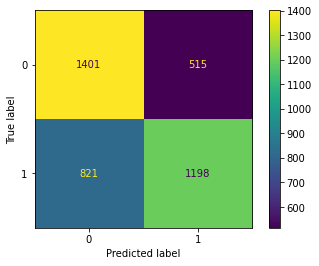

In [23]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# features_test = base_model.predict_generator(test_datagen, steps= (test_data.shape[0]//batch_size)+1)
y_pred = model.predict(test_datagen)
y_pred_bin = np.where(y_pred > 0.5, 1, 0)
conf = confusion_matrix(test_labels, y_pred_bin)
disp = ConfusionMatrixDisplay(confusion_matrix= conf)


disp = disp.plot()

plt.show()